<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitskiy](https://yorko.github.io). Translated by [Sergey Oreshkov](https://www.linkedin.com/in/sergeoreshkov/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center> Assignment #8 (demo)

## <center> Implementation of online regressor

Here we'll implement a regressor trained with stochastic gradient descent (SGD). Fill in the missing code. If you do evething right, you'll pass a simple embedded test.

## <center>Linear regression and Stochastic Gradient Descent

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Implement class `SGDRegressor`. Specification:
- class is inherited from `sklearn.base.BaseEstimator`
- constructor takes parameters `eta` – gradient step ($10^{-3}$ by default) and `n_epochs` – dataset pass count (3 by default)
- constructor also creates `mse_` and `weights_` lists in order to track mean squared error and weight vector during gradient descent iterations
- Class has `fit` and `predict` methods
- The `fit` method takes matrix `X` and vector `y` (`numpy.array` objects) as parameters, appends column of ones to  `X` on the left side, initializes weight vector `w` with **zeros** and then makes `n_epochs` iterations of weight updates (you may refer to this [article](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-8-vowpal-wabbit-fast-learning-with-gigabytes-of-data-60f750086237) for details), and for every iteration logs mean squared error and weight vector `w` in corresponding lists we created in the constructor. 
- Additionally the `fit` method will create `w_` variable to store weights which produce minimal mean squared error
- The `fit` method returns current instance of the `SGDRegressor` class, i.e. `self`
- The `predict` method takes `X` matrix, adds column of ones to the left side and returns prediction vector, using weight vector `w_`, created by the `fit` method.

In [63]:
class SGDRegressor(BaseEstimator):
    # you code here
    def __init__(self, eta = 1e-3, n_epochs = 3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = []
        self.weights_ = []
        
    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        w = [0]*X.shape[1]

        for i in tqdm(range(self.n_epochs)):
            for i in range(X.shape[0]):
                update_term = self.eta*(np.dot(X[i, :], w) - y[i])*X[i, :]
                w = w - update_term
                self.weights_.append(w)
                self.mse_.append(mean_squared_error(y, np.dot(X, w)))
        self.w_ = self.weights_[np.argmin(self.mse_)]
        return self
                  
    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        predicted_y = np.dot(X, self.w_)
        return predicted_y              

Let's test out the algorithm on height/weight data. We will predict heights (in inches) based on weights (in lbs).

In [2]:
data_demo = pd.read_csv('../input/weights_heights.csv')

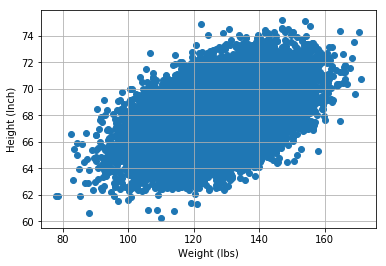

In [3]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

In [4]:
X, y = data_demo['Weight'].values, data_demo['Height'].values

Perform train/test split and scale data.

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

Train created `SGDRegressor` with `(X_train_scaled, y_train)` data. Leave default parameter values for now.

In [64]:
sgd_reg = SGDRegressor()
sgd_reg.fit(X_train_scaled, y_train)



  0%|          | 0/3 [00:00<?, ?it/s]



ValueError: shapes (2,) and (17500,2) not aligned: 2 (dim 0) != 17500 (dim 0)

Draw a chart with training process  – dependency of mean squared error from the i-th SGD iteration number.

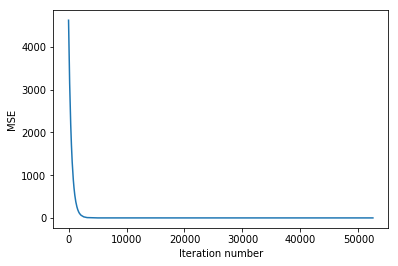

In [54]:
plt.plot(sgd_reg.mse_);
plt.xlabel('Iteration number')
plt.ylabel('MSE');

Print the minimal value of mean squared error and the best weights vector.

In [55]:
print('min error: ', np.min(sgd_reg.mse_))
print('best weights:', sgd_reg.w_)

min error:  2.7151352406643627
best weights: [67.9898497   0.94447605]


Draw chart of model weights ($w_0$ and $w_1$) behavior during training.

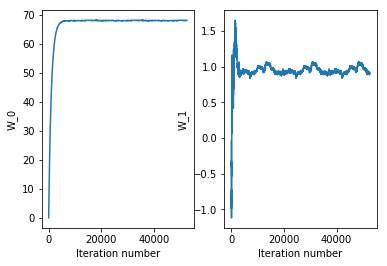

In [56]:
plt.subplot(1,2,1)
plt.plot([w[0] for w in sgd_reg.weights_]);
plt.xlabel('Iteration number')
plt.ylabel('W_0');
plt.subplot(1,2,2)
plt.plot([w[1] for w in sgd_reg.weights_]);
plt.xlabel('Iteration number')
plt.ylabel('W_1');

Make a prediction for hold-out  set `(X_valid_scaled, y_valid)` and check MSE value.

In [58]:
# you code here
sgd_predicted_holdout = sgd_reg.predict(X_valid_scaled)
sgd_holdout_mse = mean_squared_error(y_valid, sgd_predicted_holdout)
print(sgd_holdout_mse)

2.6708681207033784


Do the same thing for `LinearRegression` class from `sklearn.linear_model`. Evaluate MSE for hold-out set.

In [61]:
# you code here
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
linreg_predicted_holdout = linreg.predict(X_valid_scaled)
linreg_holdout_mse = mean_squared_error(y_valid, linreg_predicted_holdout)
print(linreg_holdout_mse)

2.670830767667635


In [62]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.\n Linreg's holdout MSE: {}"
          "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse))

Correct!
